In [2]:
import tensorflow as tf

## Tensorflow already contain MNIST dataset which can be loaded using keras
### It contains 60,000 training samples and 10,000 testing samples


In [3]:
mnist = tf.keras.datasets.mnist

## Now divide training and testing datasets

In [4]:
(a_train, b_train),(a_test,b_test)=mnist.load_data()

11493376/11490434 [==============================] - 35s 3us/step


In [6]:
import matplotlib.pyplot as plt

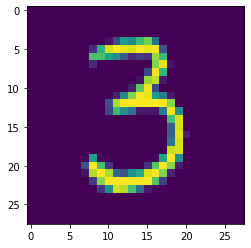

In [7]:
plt.imshow(a_train[50])

## Before normalizing

In [8]:
 print(a_train[50])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

## Normalizing the data

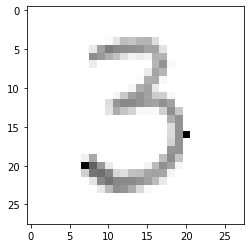

In [9]:
a_train = tf.keras.utils.normalize(a_train, axis=1)
a_test = tf.keras.utils.normalize(a_test, axis=1)
plt.imshow(a_train[50],cmap = plt.cm.binary)

## After Normalizing

In [10]:
print(a_train[50])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Normalizing is important as if the color changes we do not need to care about it

In [11]:
print(b_train[50]) # b contains labels

3


#  Resizing image

In [12]:
import numpy as np

In [43]:
img_size=28
a_trainer=np.array(a_train).reshape(-1,img_size,img_size,1)
a_tester=np.array(a_test).reshape(-1,img_size,img_size,1)
print("training sample dimensions",a_trainer.shape)
print("testing sample dimensions",a_tester.shape)

training sample dimensions (60000, 28, 28, 1)
testing sample dimensions (10000, 28, 28, 1)


# Training on 60,000 samples of MNIST dataset

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation , Flatten,Conv2D, MaxPooling2D

### creating neural network

In [24]:
model= Sequential()

In [25]:
## First convolution layer
model.add(Conv2D(64,(3, 3),input_shape = a_trainer.shape[1:]))
model.add(Activation("relu")) ## to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2)))

## Fully connected layer 1
model.add(Flatten()) ##2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))


In [26]:
## Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))


In [27]:
## Fully connected layer last 
model.add(Dense(10))
model.add(Activation('softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                692288    
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

In [29]:
 print("Total training samples ",len(a_trainer))

Total training samples  60000


In [34]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# Training my model

In [35]:
model.fit(a_trainer,b_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2652 - accuracy: 0.9203 - val_loss: 0.1207 - val_accuracy: 0.9646
Epoch 2/5
1313/1313 [==============================] - 22s 16ms/step - loss: 0.0868 - accuracy: 0.9743 - val_loss: 0.0968 - val_accuracy: 0.9720
Epoch 3/5
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0597 - accuracy: 0.9814 - val_loss: 0.0872 - val_accuracy: 0.9737
Epoch 4/5
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0826 - val_accuracy: 0.9775
Epoch 5/5
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0758 - val_accuracy: 0.9780


# Evaluating testing dataset

In [36]:
test_loss, test_acc =model.evaluate(a_tester,b_test)
print("Test loss ", test_loss)
print("Validation accuracy",test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0633 - accuracy: 0.9812
Test loss  0.06331788003444672
Validation accuracy 0.9811999797821045


### prediction

In [37]:
prediction=model.predict([a_tester])
print(prediction)

[[2.4723048e-08 6.6348398e-06 2.0132943e-06 ... 9.9999022e-01
  9.4500386e-08 3.0323008e-07]
 [2.9738424e-06 4.2638793e-03 9.9566048e-01 ... 3.7853638e-06
  1.2716491e-07 9.9844817e-07]
 [1.0113864e-09 9.9999690e-01 2.5781436e-08 ... 2.1207698e-06
  4.2256779e-08 2.2063139e-08]
 ...
 [7.8732104e-11 9.5995041e-08 3.3479273e-09 ... 6.9840848e-07
  5.1934212e-06 2.9290466e-06]
 [2.8824743e-09 7.3464554e-07 7.1925236e-08 ... 1.0311223e-08
  5.4024631e-04 9.9423547e-10]
 [6.6828562e-07 5.9066533e-08 1.5975091e-07 ... 4.1376744e-08
  5.1031709e-08 2.8273499e-07]]


In [41]:
print (np.argmax(prediction[378]))

1


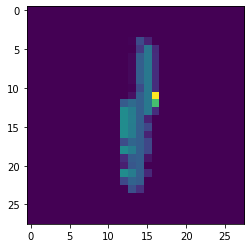

In [42]:
plt.imshow(a_test[378])